In [2]:
# importing required packages and libraries for project

import pandas as pd 

import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline 
from importlib import reload
plt=reload(plt)
from sklearn.preprocessing import StandardScaler 

from sklearn.cluster import KMeans  
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# reading the csv file 
data = pd.read_csv("C:/Users/ISHANT/Desktop/csv_files/dataset_final_1.csv")

FileNotFoundError: [Errno 2] File C:/Users/ISHANT/Desktop/csv_files/dataset_final_1.csv does not exist: 'C:/Users/ISHANT/Desktop/csv_files/dataset_final_1.csv'

In [33]:
# A visual control of the first five rows.
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
# A visual control of the last five rows.
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [35]:
# information of data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [36]:
# shape of our data set
data.shape

(10000, 14)

In [41]:
# the first and third column is simply an index and surname which we can delete
#data.drop(data.columns[0],inplace=True,axis=1)  #apply 3 times
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [42]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [43]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [44]:
# assign #1 to Male and #2 to Female
data.Gender[data.Gender == 'Male']=1
data.Gender[data.Gender == 'Female']=2

# assign #1 to France, #2 to Spain, and #3 to Germany
data.Geography[data.Geography == 'France']=1
data.Geography[data.Geography == 'Spain']=2
data.Geography[data.Geography == 'Germany']=3

data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,608,2,2,41,1,83807.86,1,0,1,112542.58,0
2,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,850,2,2,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,2,36,7,0.00,1,0,1,42085.58,1
9998,772,3,1,42,3,75075.31,2,1,0,92888.52,1


In [45]:
data['Gender'].astype(float)

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
9995    1.0
9996    1.0
9997    2.0
9998    1.0
9999    2.0
Name: Gender, Length: 10000, dtype: float64

In [46]:
data['Geography'].astype(float)

0       1.0
1       2.0
2       1.0
3       1.0
4       2.0
       ... 
9995    1.0
9996    1.0
9997    1.0
9998    3.0
9999    1.0
Name: Geography, Length: 10000, dtype: float64

In [47]:
# print the missing values in each columns
print("Missing values in each column:\n{}".format(data.isnull().sum()))

Missing values in each column:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [48]:
# to print data types of columns 
print("Data types of each columns:\n{}".format(data.dtypes))

Data types of each columns:
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [49]:
filtered_data=data.drop_duplicates()

In [50]:
filtered_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,608,2,2,41,1,83807.86,1,0,1,112542.58,0
2,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,850,2,2,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,2,36,7,0.00,1,0,1,42085.58,1
9998,772,3,1,42,3,75075.31,2,1,0,92888.52,1


In [51]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [52]:
filtered_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [53]:
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
['Geography', 'Gender']


In [54]:
data_num=data[numeric_var_names]
data_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [55]:
data_cat = data[cat_var_names]
data_cat.head()

,Geography,Gender
0,1,2
1,2,2
2,1,2
3,1,2
4,2,2


In [56]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['NO.', 'MISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])



In [57]:
num_summary=data_num.apply(lambda x: var_summary(x))
num_summary

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
NO.,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
MISS,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
SUM,6.505288e+06,389218.000000,50128.000000,7.648589e+08,15302.000000,7055.000000,5151.000000,1.000902e+09,2037.000000
MEAN,6.505288e+02,38.921800,5.012800,7.648589e+04,1.530200,0.705500,0.515100,1.000902e+05,0.203700
MEDIAN,6.520000e+02,37.000000,5.000000,9.719854e+04,1.000000,1.000000,1.000000,1.001939e+05,0.000000
STD,9.665330e+01,10.487806,2.892174,6.239741e+04,0.581654,0.455840,0.499797,5.751049e+04,0.402769
VAR,9.341860e+03,109.994084,8.364673,3.893436e+09,0.338322,0.207791,0.249797,3.307457e+09,0.162223
MIN,3.500000e+02,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,1.158000e+01,0.000000
P1,4.320000e+02,21.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,1.842825e+03,0.000000
P5,4.890000e+02,25.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,9.851819e+03,0.000000


In [58]:
cat_summary=data_cat.apply(lambda x: var_summary(x))
#cat_summary

In [59]:
data_num.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [60]:
#Handling Outliers - at 99%tile or 95%tile if required after including some particular vars like income
data = data.apply(lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99)) )
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,608,2,2,41,1,83807.86,1,0,1,112542.58,0
2,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,850,2,2,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,2,36,7,0.00,1,0,1,42085.58,1
9998,772,3,1,42,3,75075.31,2,1,0,92888.52,1


In [61]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

data_num=data_num.apply(lambda x: Missing_imputation(x))

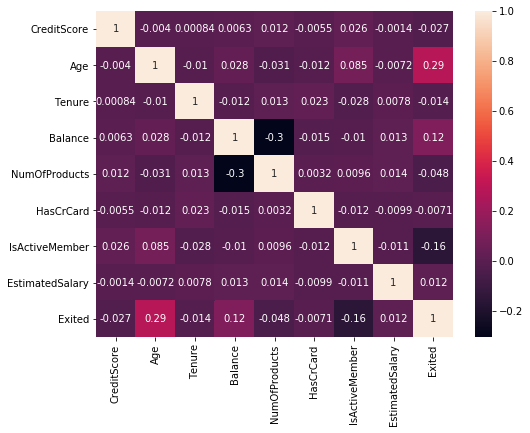

In [62]:
# visualize correlation matrix in Seaborn using a heatmap
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['axes.grid'] = True
sns.heatmap(data_num.corr(),annot=True)

In [63]:
data_num.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [64]:
data_cat.columns

Index(['Geography', 'Gender'], dtype='object')

In [65]:
#Standardrizing data
sc=StandardScaler()
data_num_scaled=sc.fit_transform(data_num)

In [66]:
pd.DataFrame(data_num_scaled).head()

,0,1,2,3,4,5,6,7,8
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775


In [67]:
data_cat_scaled=sc.fit_transform(data_cat)
pd.DataFrame(data_cat_scaled).head()

,0,1
0,-0.902587,1.095988
1,0.301665,1.095988
2,-0.902587,1.095988
3,-0.902587,1.095988
4,0.301665,1.095988


In [68]:
pd.DataFrame(data_num_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-4.870326e-16,2.484679e-16,-1.400324e-16,-5.978551e-17,-8.652634e-16,-2.676082e-16,2.164047e-16,-1.580958e-17,-7.587930e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.109504e+00,-1.994969e+00,-1.733315e+00,-1.225848e+00,-9.115835e-01,-1.547768e+00,-1.030670e+00,-1.740268e+00,-5.057748e-01
25%,-6.883586e-01,-6.600185e-01,-6.959818e-01,-1.225848e+00,-9.115835e-01,-1.547768e+00,-1.030670e+00,-8.535935e-01,-5.057748e-01
50%,1.522218e-02,-1.832505e-01,-4.425957e-03,3.319639e-01,-9.115835e-01,6.460917e-01,9.702426e-01,1.802807e-03,-5.057748e-01
75%,6.981094e-01,4.842246e-01,6.871299e-01,8.199205e-01,8.077366e-01,6.460917e-01,9.702426e-01,8.572431e-01,-5.057748e-01
max,2.063884e+00,5.061197e+00,1.724464e+00,2.795323e+00,4.246377e+00,6.460917e-01,9.702426e-01,1.737200e+00,1.977165e+00


In [69]:
pd.DataFrame(data_cat_scaled).describe()

,0,1
count,1.000000e+04,1.000000e+04
mean,-4.243161e-16,2.421996e-15
std,1.000050e+00,1.000050e+00
min,-9.025865e-01,-9.124191e-01
25%,-9.025865e-01,-9.124191e-01
50%,-9.025865e-01,-9.124191e-01
75%,1.505917e+00,1.095988e+00
max,1.505917e+00,1.095988e+00


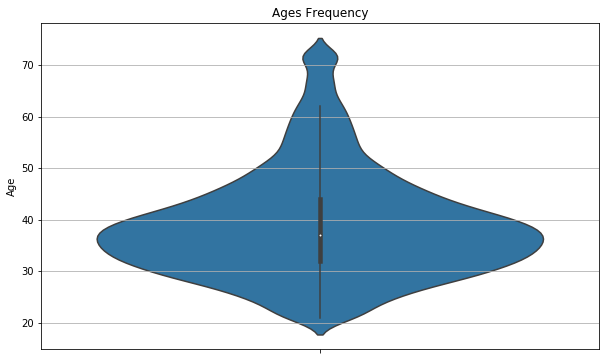

In [70]:
# age frequency of customers
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=data["Age"])
plt.show()

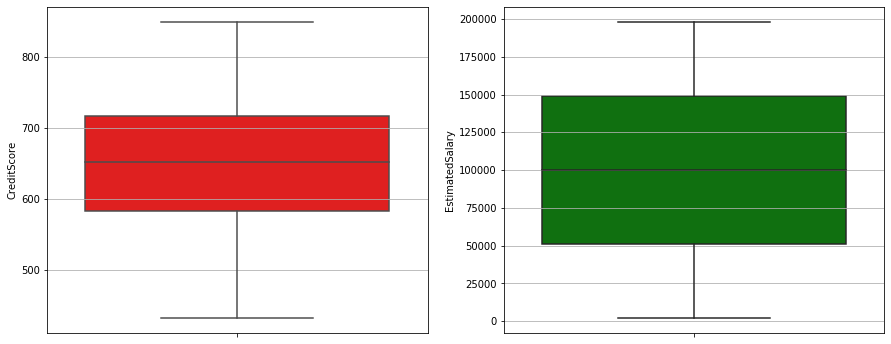

In [71]:
# box plot of Credit score and Estimated salary
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=data["CreditScore"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=data["EstimatedSalary"], color="green")
plt.show()

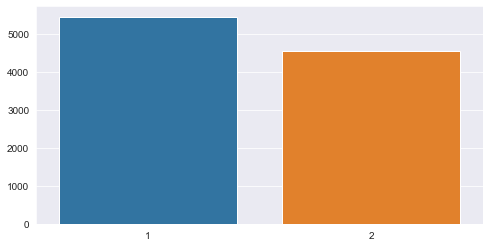

In [72]:
#distribution of male and female population in the dataset
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

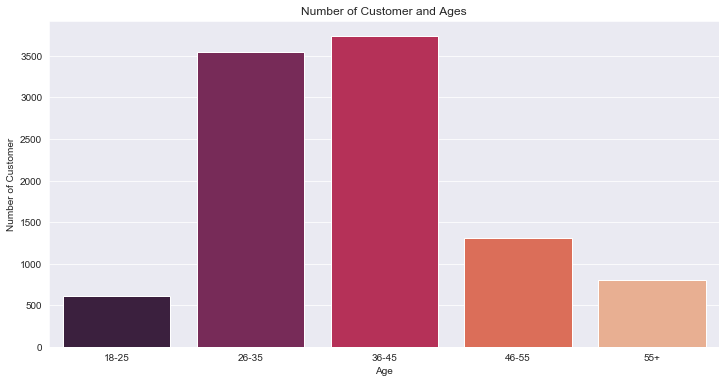

In [73]:
#bar plot to check the distribution of number of customers in each age group
age18_25 = data.Age[(data.Age <= 25) & (data.Age >= 18)]
age26_35 = data.Age[(data.Age <= 35) & (data.Age >= 26)]
age36_45 = data.Age[(data.Age <= 45) & (data.Age >= 36)]
age46_55 = data.Age[(data.Age <= 55) & (data.Age >= 46)]
age55above = data.Age[data.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(12,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()


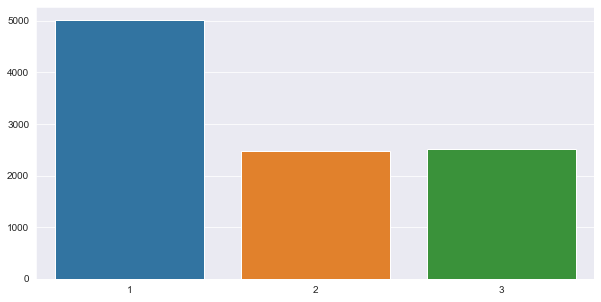

In [74]:
#bar plot to check the distribution of number of customers in each geographic region
Geography = data.Geography.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x=Geography.index, y=Geography.values)
plt.show()

In [75]:
print(" Minimum credit score:",data.CreditScore.min(),"\n","Maximum credit score:",data.CreditScore.max())

 Minimum credit score: 432 
 Maximum credit score: 850


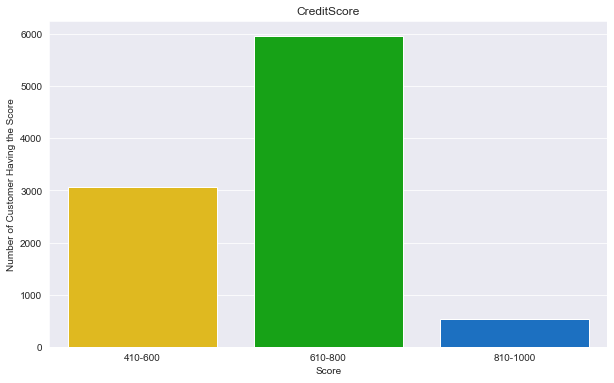

In [76]:
#bar plot to visualize the number of customers according to their Credit score
cs410_600 = data["CreditScore"][(data["CreditScore"] >= 410) & (data["CreditScore"] <= 600)]
cs610_800 = data["CreditScore"][(data["CreditScore"] >= 610) & (data["CreditScore"] <= 800)]
cs810_1000 = data["CreditScore"][(data["CreditScore"] >= 810) & (data["CreditScore"] <= 1000)]

csx = ["410-600", "610-800", "810-1000"]
csy = [len(cs410_600.values), len(cs610_800.values), len(cs810_1000.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=csx, y=csy, palette="nipy_spectral_r")
plt.title("CreditScore")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

In [77]:
print(" Minumum balance:",data.Balance.min(),"\n","Maximum balance",data.Balance.max())

 Minumum balance: 0.0 
 Maximum balance 185967.98540000006


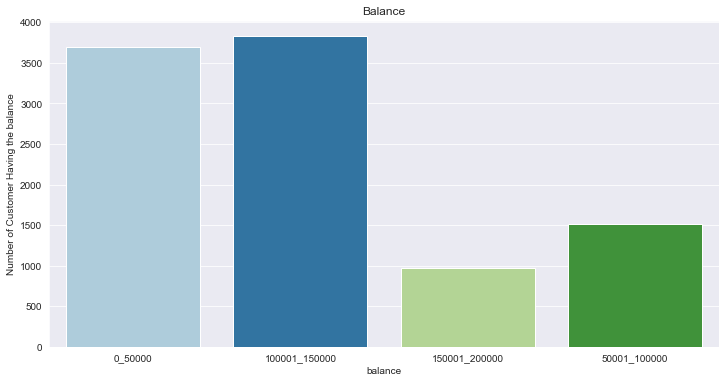

In [78]:
#bar plot to visualize the number of customers according to their Balance
b0_50000 = data["Balance"][(data["Balance"] >= 0) & (data["Balance"] <= 50000)]
b50001_100000 = data["Balance"][(data["Balance"] >= 50001) & (data["Balance"] <= 100000)]
b100001_150000 = data["Balance"][(data["Balance"] >= 100001) & (data["Balance"] <= 150000)]
b150001_200000 = data["Balance"][(data["Balance"] >= 150001) & (data["Balance"] <= 200000)]

bx = ["0_50000", "50001_100000", "100001_150000","150001_200000"]
by = [len(b0_50000.values), len(b50001_100000.values), len(b100001_150000.values), len(b150001_200000.values)]

plt.figure(figsize=(12,6))
sns.barplot(x=bx, y=by,palette="Paired")
plt.title("Balance")
plt.xlabel("balance")
plt.ylabel("Number of Customer Having the balance")
plt.show()

In [79]:
print(" Minimum Estimated salary:",data.EstimatedSalary.min(),"\n","Maximum Estimated salary:",data.EstimatedSalary.max())

 Minimum Estimated salary: 1842.8253000000002 
 Maximum Estimated salary: 198069.7345


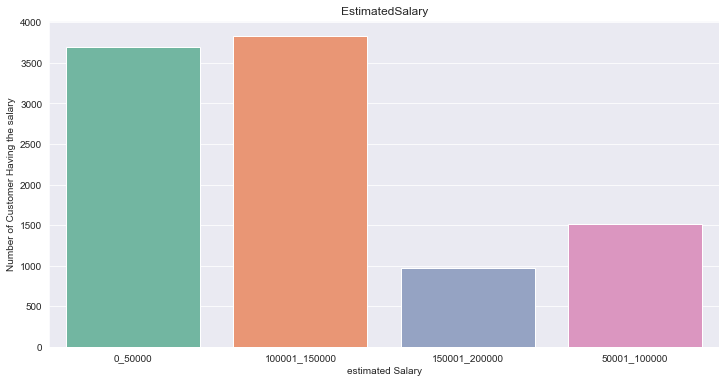

In [80]:
#bar plot to visualize the number of customers according to their Estimated Salary
es0_50000 = data["EstimatedSalary"][(data["EstimatedSalary"] >= 0) & (data["EstimatedSalary"] <= 50000)]
es50001_100000 = data["EstimatedSalary"][(data["EstimatedSalary"] >= 50001) & (data["EstimatedSalary"] <= 100000)]
es100001_150000 = data["EstimatedSalary"][(data["EstimatedSalary"] >= 100001) & (data["EstimatedSalary"] <= 150000)]
es150001_200000 = data["EstimatedSalary"][(data["EstimatedSalary"] >= 150001) & (data["EstimatedSalary"] <= 200000)]

esx = ["0_50000", "50001_100000", "100001_150000","150001_200000"]
esy = [len(es0_50000.values), len(es50001_100000.values), len(es100001_150000.values), len(es150001_200000.values)]

plt.figure(figsize=(12,6))
sns.barplot(x=bx, y=by,palette="Set2")
plt.title("EstimatedSalary")
plt.xlabel("estimated Salary")
plt.ylabel("Number of Customer Having the salary")
plt.show()

In [81]:
data.EstimatedSalary.head(15)

0     101348.88
1     112542.58
2     113931.57
3      93826.63
4      79084.10
5     149756.71
6      10062.80
7     119346.88
8      74940.50
9      71725.73
10     80181.12
11     76390.01
12     26260.98
13    190857.79
14     65951.65
Name: EstimatedSalary, dtype: float64

In [82]:
data.Balance.head(15)

0          0.00
1      83807.86
2     159660.80
3          0.00
4     125510.82
5     113755.78
6          0.00
7     115046.74
8     142051.07
9     134603.88
10    102016.72
11         0.00
12         0.00
13         0.00
14         0.00
Name: Balance, dtype: float64

In [83]:
data.EstimatedSalary.tail(15)

9985     96833.00
9986     34047.54
9987      1914.41
9988     49337.84
9989    179436.60
9990     53667.08
9991     69384.71
9992    195192.40
9993     29179.52
9994    167773.55
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, dtype: float64

In [84]:
data.Balance.tail(15)

9985    123841.49
9986    183579.54
9987    180307.73
9988         0.00
9989         0.00
9990     35016.60
9991     88381.21
9992         0.00
9993    155060.41
9994         0.00
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, dtype: float64

In [85]:
#Elbow Analysis
cluster_range = range( 1, 10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( data_num_scaled )
    cluster_errors.append( clusters.inertia_ )

In [86]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,90000.000000
1,2,78766.917278
2,3,70380.303728
3,4,64869.646061
4,5,61498.807589
5,6,58358.400151
6,7,55978.142828
7,8,53171.676240
8,9,50916.635426


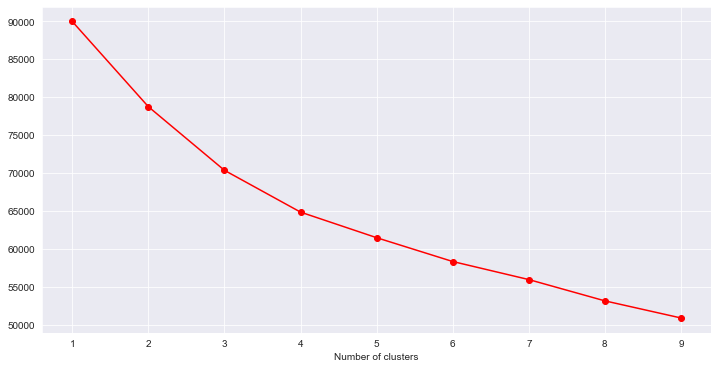

In [87]:
plt.figure(figsize=(12,6))
plt.xlabel("Number of clusters")

plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" , color = "r")

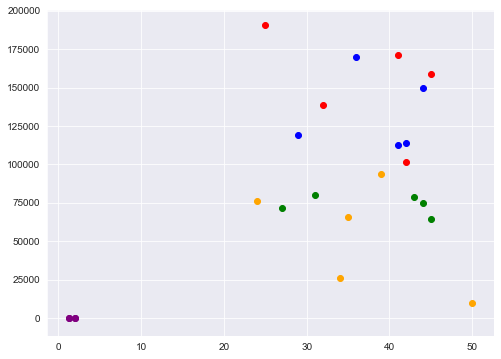

In [89]:
df1 = data[data.label == 0]
df2 = data[data.label == 1]
df3 = data[data.label == 2]
df4 = data[data.label == 3]
plt.scatter(df1.Age.head(5), df1.EstimatedSalary.head(5), color="green")
plt.scatter(df2.Age.head(5), df2.EstimatedSalary.head(5), color="red")
plt.scatter(df3.Age.head(5), df3.EstimatedSalary.head(5), color="blue")
plt.scatter(df4.Age.head(5), df4.EstimatedSalary.head(5), color="orange")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = "purple", marker="o", label="centroid")

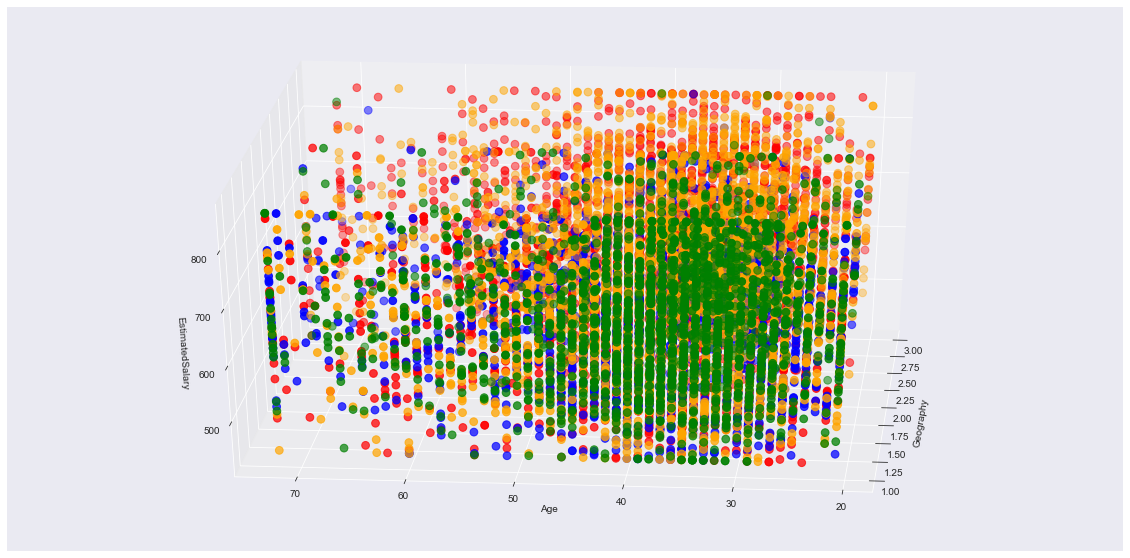

In [92]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(data.iloc[:,1:])
data["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Geography"][data.label == 0], data.Age[data.label == 0], data["CreditScore"][data.label == 0], c='blue', s=60)
ax.scatter(data["Geography"][data.label == 1], data.Age[data.label == 1], data["CreditScore"][data.label == 1], c='red', s=60)
ax.scatter(data["Geography"][data.label == 2], data.Age[data.label == 2], data["CreditScore"][data.label == 2], c='green', s=60)
ax.scatter(data["Geography"][data.label == 3], data.Age[data.label == 3], data["CreditScore"][data.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.xlabel("Geography")
plt.ylabel("Age")
ax.set_zlabel('EstimatedSalary')
plt.show()

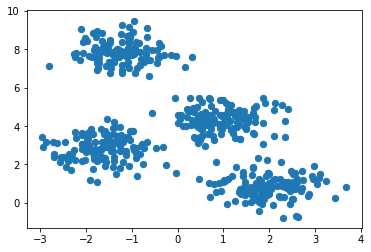

In [3]:
#applying k means
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=500, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=40);

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

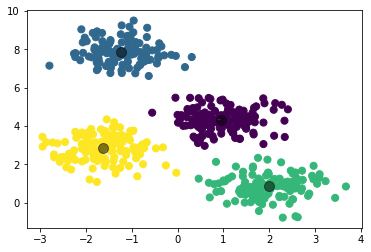

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


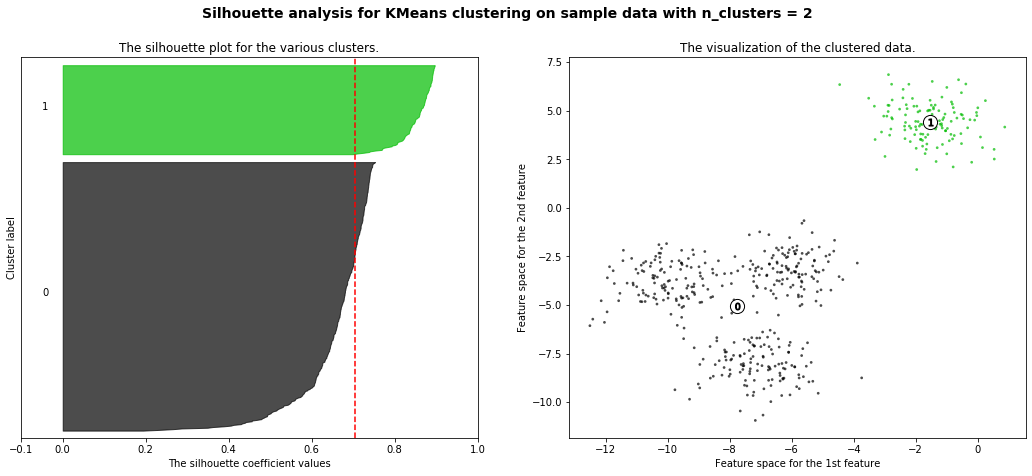

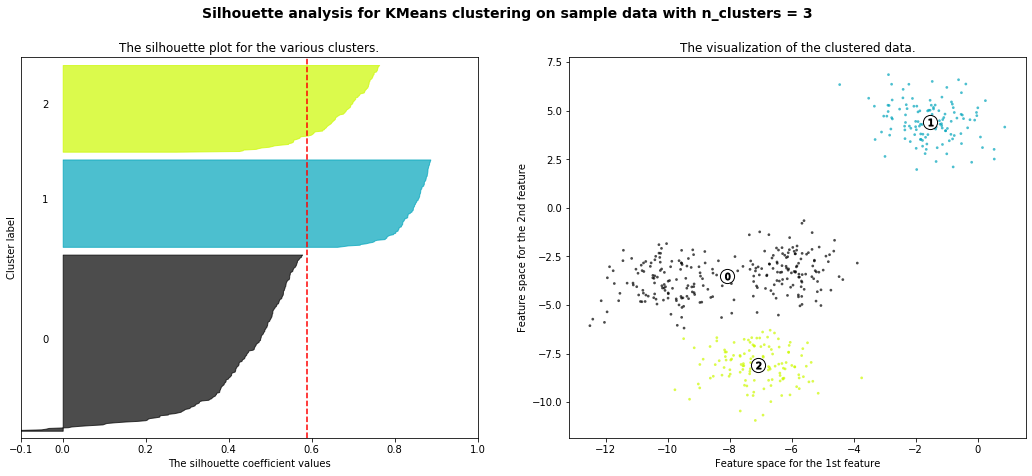

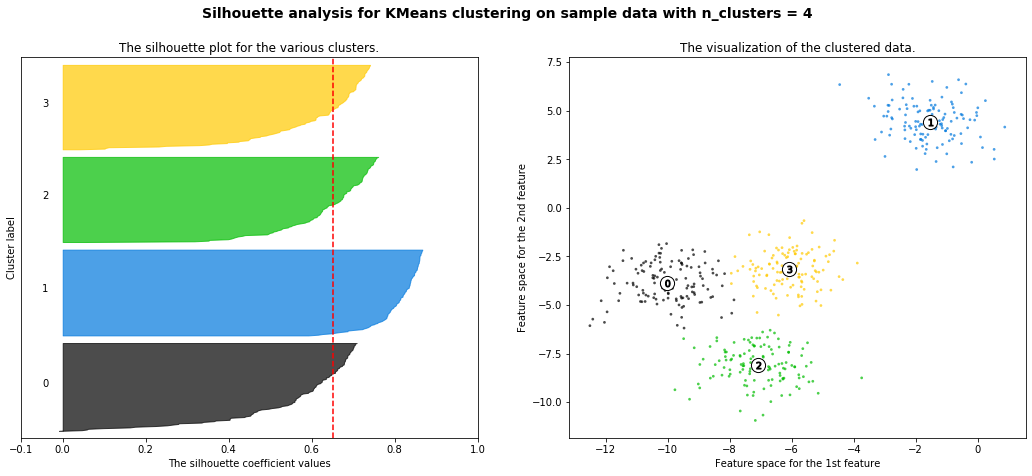

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [1]:
from sklearn import preprocessing
print(data.data.shape)

NameError: name 'data' is not defined